In [1]:
library(tidyr)
library(dplyr)
library(ggiraphExtra)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)

#### Figure 2B


	Wilcoxon rank sum test with continuity correction

data:  milkweightlbs by disease
W = 3665800, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  cells by disease
W = 1844448, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


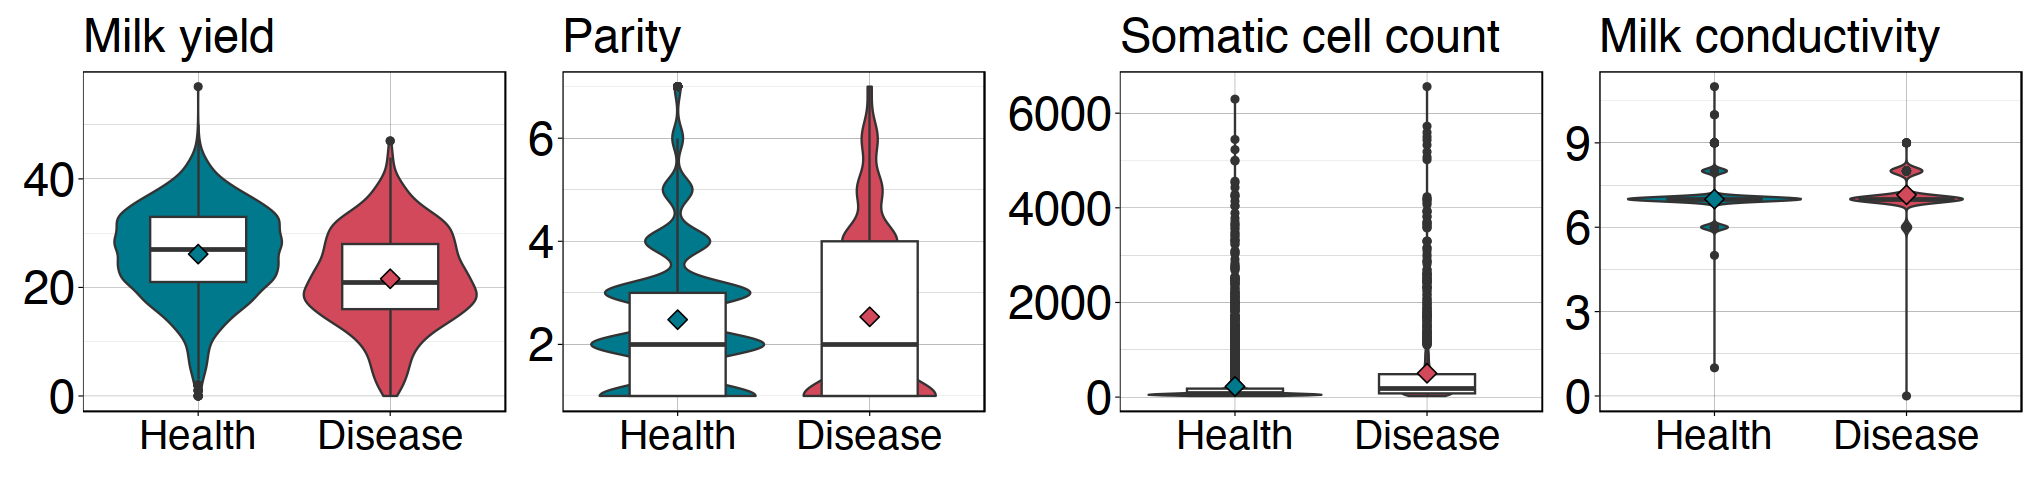

In [2]:
main_theme = theme_linedraw() +
  theme(legend.position = "none",
        plot.title = element_text(size = 28),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 28),
        axis.text.x = element_text(color = "black", size = 24)) 

data <- read.csv('./JM006_0901_whole.csv', sep = ",", header = T, row.names = NULL)
data <- subset(data, select = c('disease', 'milkweightlbs', 'parity', 'cells', 'conductivity'))
data <- na.omit(data)
data$disease <- ifelse(data$disease == 1, "Disease", "Health")
data$disease <- factor(data$disease, levels=c("Health", "Disease"))

p1 <- ggplot(data, aes(x=disease, y=milkweightlbs, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Milk yield") +
  main_theme

p2 <- ggplot(data, aes(x=disease, y=parity, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Parity") +
  main_theme

p3 <- ggplot(data, aes(x=disease, y=cells, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Somatic cell count") +
  main_theme

p4 <- ggplot(data, aes(x=disease, y=conductivity, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Milk conductivity") +
  main_theme

options(repr.plot.width=17, repr.plot.height=4) 
p1 + p2 + p3 + p4 + plot_layout(nrow = 1)

wilcox.test(milkweightlbs ~ disease, data=data) 
wilcox.test(cells ~ disease, data=data)

#### Figure 2C

In [3]:
center_scale <- function(x) {
    scale(x, scale = TRUE)
}

spc <- read.csv('./JM006_spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))

spc_s <- spc %>% filter(disease == 1)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_d_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_d_id <- spc_filtered_d_id$vial

spc_s <- spc %>% filter(disease == 0)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_h_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_h_id <- spc_filtered_h_id$vial

spc_filtered_id <- c(spc_filtered_d_id, spc_filtered_h_id)

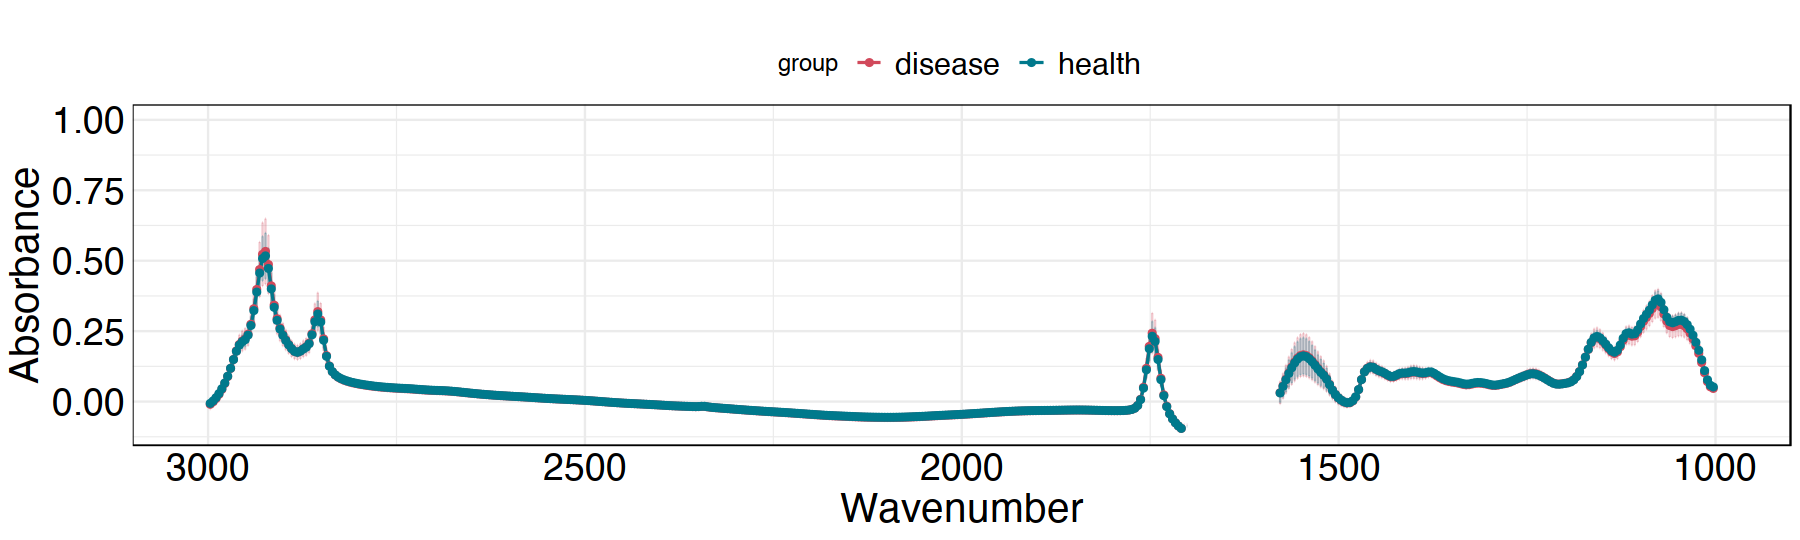

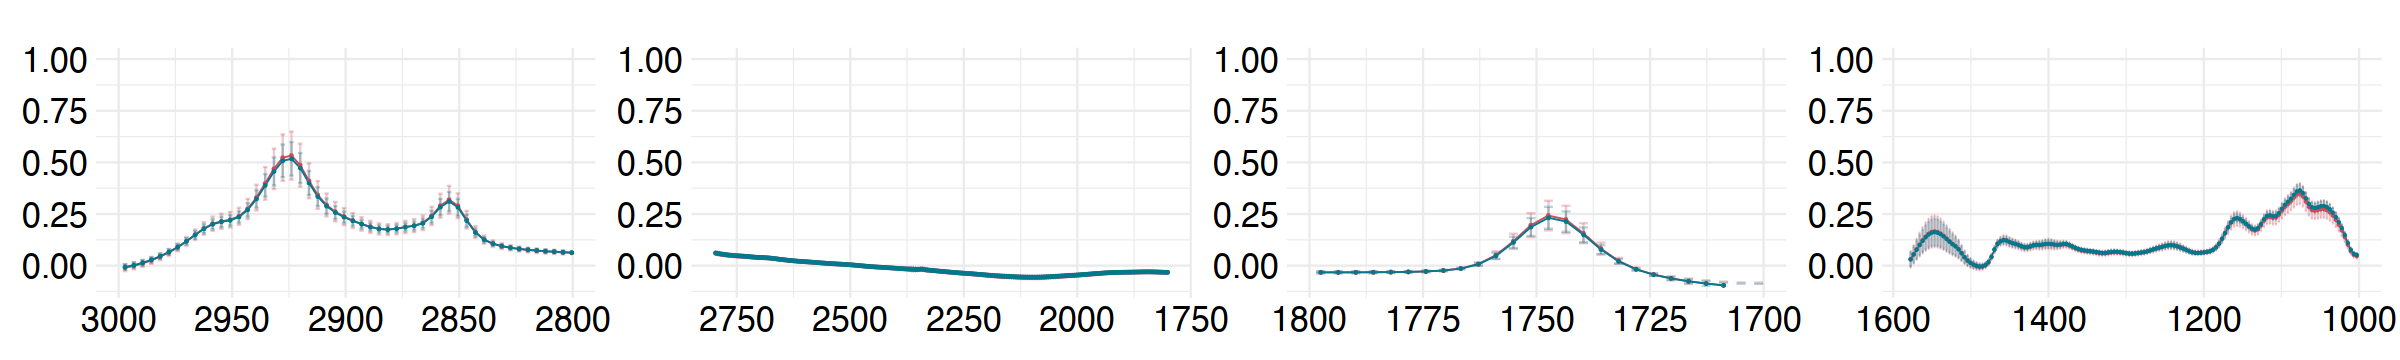

In [4]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

data_d <- spc_filtered %>% filter(disease == 1)
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)

data_h <- spc_filtered %>% filter(disease == 0) 
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)

se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
pd <- position_dodge(0.1) 
options(repr.plot.width=15, repr.plot.height=4.5)
ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.3) +
    geom_line(position=pd, size = 0.7) +
    geom_point(position=pd, size=1.5) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 1000) +
    ylim(-0.1, 1) +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "top", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank()) 

p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1585, 1000) +
    ylim(-0.1, 1) +
    main_theme

p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1800, 1700) +
    ylim(-0.1, 1) +
    main_theme

p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 1) +
    main_theme

p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(2800, 1800) +
    ylim(-0.1, 1) +
    main_theme

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)

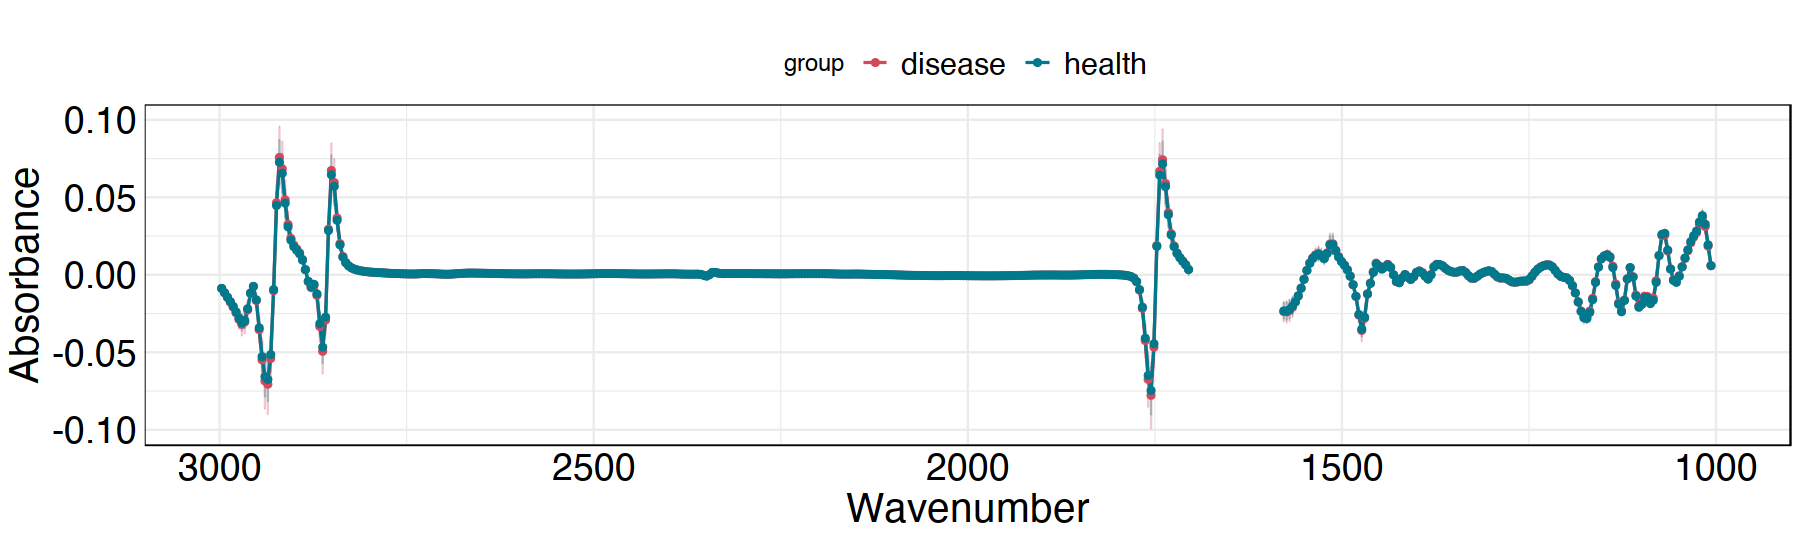

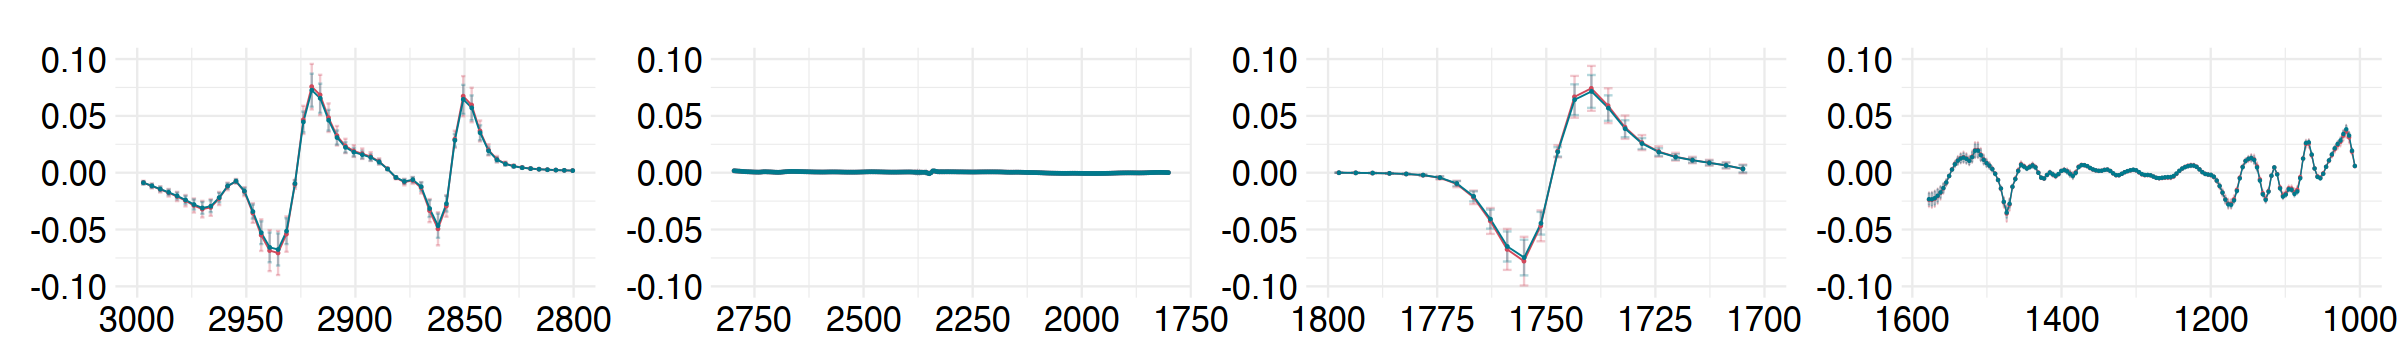

In [5]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
wn <- colnames(spc_filtered)
spc_filtered <- t(apply(spc_filtered, 1, function(x) sgolayfilt(x, p = 1, n = 3, m = 1))) %>% as.data.frame()
colnames(spc_filtered) <- wn
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

data_d <- spc_filtered %>% filter(disease == 1)
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)

data_h <- spc_filtered %>% filter(disease == 0) 
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)

se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
pd <- position_dodge(0.1) 
options(repr.plot.width=15, repr.plot.height=4.5)
ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.3) +
    geom_line(position=pd, size = 0.7) +
    geom_point(position=pd, size=1.5) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 1000) +
    ylim(-0.1, 0.1) +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "top", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank()) 

p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1585, 1000) +
    ylim(-0.1, 0.1) +
    main_theme

p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1800, 1700) +
    ylim(-0.1, 0.1) +
    main_theme 

p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.1) +
    main_theme

p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(2800, 1800) +
    ylim(-0.1, 0.1) +
    main_theme

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)